In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
data={'Country':['Output_Q', 'Labour_L', 'Capital_K'],
     'B' :[80, 60, 50],
       'C' : [150, 100 ,100],
       'D' : [135, 100, 80],
       'E' : [165, 120, 100],
       'F' : [95, 70, 60],
       'G' : [130, 90, 80],
       'H' : [110, 80, 70]}
nationaldata= pd.DataFrame(data, columns = [ 'Country', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
print (nationaldata)

     Country   B    C    D    E   F    G    H
0   Output_Q  80  150  135  165  95  130  110
1   Labour_L  60  100  100  120  70   90   80
2  Capital_K  50  100   80  100  60   80   70


In [32]:
mean = nationaldata.mean(axis = 1)
var = nationaldata.var(axis = 1)
std = nationaldata.std(axis = 1)
median = nationaldata.median(axis = 1)

In [33]:
Summary = pd.DataFrame({'Country' : nationaldata['Country'],
                    'Mean' : mean,
                    'Variance' : var,
                    'Standard Deviation' : std,
                    'Median' : median
                   },
                  columns = ['Country','Mean','Variance','Standard Deviation','Median']
                  )
print(Summary)

     Country        Mean    Variance  Standard Deviation  Median
0   Output_Q  123.571429  914.285714           30.237158   130.0
1   Labour_L   88.571429  414.285714           20.354010    90.0
2  Capital_K   77.142857  357.142857           18.898224    80.0


In [34]:
Q = nationaldata[0:1]
Q

,Country,B,C,D,E,F,G,H
0,Output_Q,80,150,135,165,95,130,110


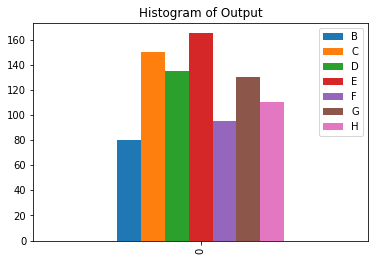

In [35]:
Q.plot(kind = 'bar', style = 'b', title = 'Histogram of Output')

In [36]:
L = nationaldata[1:2]
L

,Country,B,C,D,E,F,G,H
1,Labour_L,60,100,100,120,70,90,80


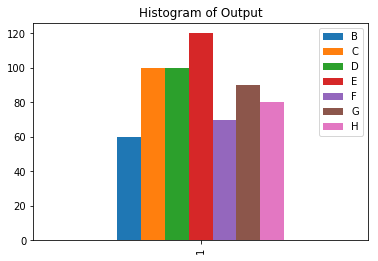

In [37]:
L.plot(kind = 'bar', style = 'b', title = 'Histogram of Output')

In [38]:
nationaldata_transpose = nationaldata.transpose()
nationaldata_transpose

,0,1,2
Country,Output_Q,Labour_L,Capital_K
B,80,60,50
C,150,100,100
D,135,100,80
E,165,120,100
F,95,70,60
G,130,90,80
H,110,80,70


In [39]:
nationaldata_transpose.columns = nationaldata_transpose.iloc[0]
nationaldata_2= nationaldata_transpose.reindex(nationaldata_transpose.index.drop("Country"))
nationaldata_2

Country,Output_Q,Labour_L,Capital_K
B,80,60,50
C,150,100,100
D,135,100,80
E,165,120,100
F,95,70,60
G,130,90,80
H,110,80,70


In [40]:
nationaldata_2["Output_Q"] = nationaldata_2.Output_Q.astype(int)
nationaldata_2["Labour_L"] = nationaldata_2.Labour_L.astype(int)
nationaldata_2["Capital_K"] = nationaldata_2.Capital_K.astype(int)
nationaldata_log = nationaldata_2
nationaldata_log['log Output'] = np.log(nationaldata_log['Output_Q'])
nationaldata_log['log Labour'] = np.log(nationaldata_log['Labour_L'])
nationaldata_log['log Capital'] = np.log(nationaldata_log['Capital_K'])
nationaldata_log

Country,Output_Q,Labour_L,Capital_K,log Output,log Labour,log Capital
B,80,60,50,4.382027,4.094345,3.912023
C,150,100,100,5.010635,4.605170,4.605170
D,135,100,80,4.905275,4.605170,4.382027
E,165,120,100,5.105945,4.787492,4.605170
F,95,70,60,4.553877,4.248495,4.094345
G,130,90,80,4.867534,4.499810,4.382027
H,110,80,70,4.700480,4.382027,4.248495


In [41]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept = True)
import statsmodels.api as sm

In [42]:
X = nationaldata_log.iloc[0:7, [4,5]]
X

Country,log Labour,log Capital
B,4.094345,3.912023
C,4.605170,4.605170
D,4.605170,4.382027
E,4.787492,4.605170
F,4.248495,4.094345
G,4.499810,4.382027
H,4.382027,4.248495


In [43]:
Y = nationaldata_log.iloc[0:7, [3]]
Y

Country,log Output
B,4.382027
C,5.010635
D,4.905275
E,5.105945
F,4.553877
G,4.867534
H,4.700480


In [44]:
linreg.fit(X, Y)
print ("Coefficients of log_Labour and log_Capital respectively:", linreg.coef_)
print ("Intercept term:", linreg.intercept_)

Coefficients of log_Labour and log_Capital respectively: [[0.54842747 0.50874094]]
Intercept term: [0.14623321]


In [46]:
X2 = sm.add_constant(X)
estimat = sm.OLS(Y, X2)
estimat2 = estimat.fit()
print (estimat2.summary())

                            OLS Regression Results                            
Dep. Variable:             log Output   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        21:28:17   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1462      0.114      1.282      

C:\Users\Nikita\Anacondaprogram\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


Text(0, 0.5, '')

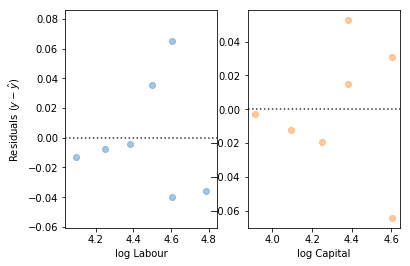

In [47]:
import seaborn as sns
fig, ax= plt.subplots(1, 2)
ax[0] = sns.residplot('log Labour', 'log Output', nationaldata_log, ax=ax[0], scatter_kws={'alpha': 0.4})
ax[0].set_ylabel('Residuals $(y-\hat{y})$')
ax[1] = sns.residplot('log Capital', 'log Output', nationaldata_log, ax=ax[1], scatter_kws={'alpha': 0.4})
ax[1].set_ylabel('')

In [48]:
estimat2.summary()

C:\Users\Nikita\Anacondaprogram\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log Output   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        21:30:12   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1462      0.114      1.282      0.269      -0.170       0.463
log Labour      0.5484      0.090      6.127      0.004       0.300       0.797
log Capital     0.5087      0.083      6.150      0.004       0.279       0.738
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.801
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.261
Skew:                           1.352   Prob(JB):                        0.323
Kurtosis:                       3.665   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""